---

<small><i>PROGRAM: Network Structural Properties (plots)
    
<small><i>AUTHOR: [Ivan Casanovas Rodríguez](https://www.linkedin.com/in/ivancasanovaas/)

<small><i>DATE: July, 2024
    
<small><i>DESCRIPTION: This program creates the plots for different properties of an undirected and
              unweighted network. The presented plots are about the degree distributions (direct and complementary
			   cumulative), the average nearest neighbors degree and the clustering coefficient.
---


# Network Structural Properties. OVERVIEW



<div class = "alert alert-info" style ="border-radius:10px;border-width:3px" >
    
    
0. [Import section](#0)
    1. [Data import](#0.1)
    2. [Extra functions](#0.2)
1. [Degree distributions](#1)
    1. [Direct, $P(k)$](#1.1)
    2. [Complementary cumulative, $P_c(k)$](#1.2)
2. [Average nearest neighbors degree, $\bar{k}_{nn}(k)$](#2)
3. [Average clustering coefficient, $\bar{c}(k)$](#3)
4. [SIS dynamics](#4)
    1. [Empirical prevalence as a function of time](#4.1)
    2. [Stationary prevalence as a function of $\lambda$](#4.2)
    3. [Life-time distribution](#4.3)
5. [Report plots](#5)
    1. [Degree distributions](#5.1)
    2. [Correlations](#5.2)



# 0. Import section <a class="anchor" id="0"></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex': True,'font.family': 'serif',})
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes

import os
import glob
import re

In [2]:
data_imp_path = '../results/dat/'
fig_exp_path = '../results/figs/'

## 0.1 Data import <a class="anchor" id="0.1"></a>

In [3]:
# List of degrees
D = pd.read_csv(data_imp_path+'/properties/degrees.txt',
                delim_whitespace=True, comment='#', header=None, names=[r'$i$',r'$D(i)$'], index_col=0)

# Degree distributions
ddd = pd.read_csv(data_imp_path+'/properties/ddd.txt',
                  delim_whitespace=True, comment='#', header=None, names=[r'$k$',r'$P(k)$'], index_col=0)
cdd = pd.read_csv(data_imp_path+'/properties/cdd.txt',
                  delim_whitespace=True, comment='#', header=None, names=[r'$k$',r'$P(k \leq K)$'], index_col=0)
ccdd = pd.read_csv(data_imp_path+'/properties/ccdd.txt',
                   delim_whitespace=True, comment='#', header=None, names=[r'$k$',r'$P_c(k)$'], index_col=0)


# Average nearest neighbors degree (original, RW & CM)
knn = pd.read_csv(data_imp_path+'/properties/knn.txt',
                  delim_whitespace=True, comment='#', header=None, names=[r'$k$',r'$\bar{k}_{nn}(k)$'], index_col=0, skiprows=2)
knn_rw = pd.read_csv(data_imp_path+'/properties/knn_rw100.txt',
                     delim_whitespace=True, comment='#', header=None, names=[r'$k$',r'$\bar{k}_{nn}(k)$'], index_col=0, skiprows=2)
knn_cm = pd.read_csv(data_imp_path+'/properties/knn_cm100.txt',
                     delim_whitespace=True, comment='#', header=None, names=[r'$k$',r'$\bar{k}_{nn}(k)$'], index_col=0, skiprows=2)

    
# Average clustering coefficient (original, RW & CM)
c = pd.read_csv(data_imp_path+'/properties/c.txt',
                delim_whitespace=True, comment='#', header=None, names=[r'$k$',r'$\bar{c}(k)$'], index_col=0)
c_rw = pd.read_csv(data_imp_path+'/properties/c_rw100.txt',
                   delim_whitespace=True, comment='#', header=None, names=[r'$k$',r'$\bar{c}(k)$'], index_col=0)
c_cm = pd.read_csv(data_imp_path+'/properties/c_cm100.txt',
                   delim_whitespace=True, comment='#', header=None, names=[r'$k$',r'$\bar{c}(k)$'], index_col=0)


## 0.2. Extra functions <a class="anchor" id="0.2"></a>

In [4]:
def axis_settings(ax,
                  xlabel=None,ylabel=None,
                  fontsize=None,
                  log_scale=None,semilog_scale=None):
    
    # Ticks of the plot
    ax.tick_params(axis="both", which ='major', direction="in", length=6, width=1, labelsize=fontsize)
    ax.tick_params(axis="both", which ='minor', direction="in", length=3, width=1, labelsize=fontsize)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    
    # Labels of the axis
    ax.set_xlabel(xlabel,fontsize=fontsize)
    ax.set_ylabel(ylabel,fontsize=fontsize)

    # Logarithm scale
    if log_scale == True:
        ax.set_xscale('log')
        ax.set_yscale('log')
     
    # Semi-logarithm scale
    if semilog_scale == True:
        ax.set_yscale('log')

    return ax


def powerlaw_model(x,A,alpha): # https://arxiv.org/pdf/1305.0215
    return A * x**(-alpha)

# 1. Degree distributions <a class="anchor" id="1"></a>

## 1.1. Direct, $P(k)$ <a class="anchor" id="1.1"></a>

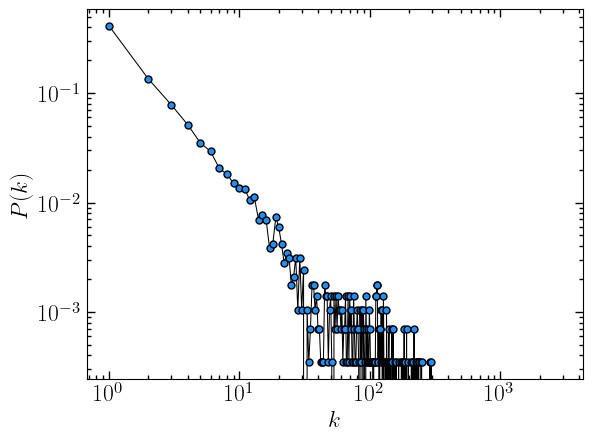

In [5]:
# Figure containing the Direct Degree Distribution
fig, ax = plt.subplots()

k = ddd.index
P_k = ddd.values.reshape(-1)

ax.plot(k, P_k,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='dodgerblue',markersize=5)

ax = axis_settings(ax,
                   xlabel=ddd.index.name,ylabel=ddd.columns[0],
                   fontsize=17,
                   log_scale=True,semilog_scale=None)

plt.savefig(fig_exp_path+'ddd.pdf')

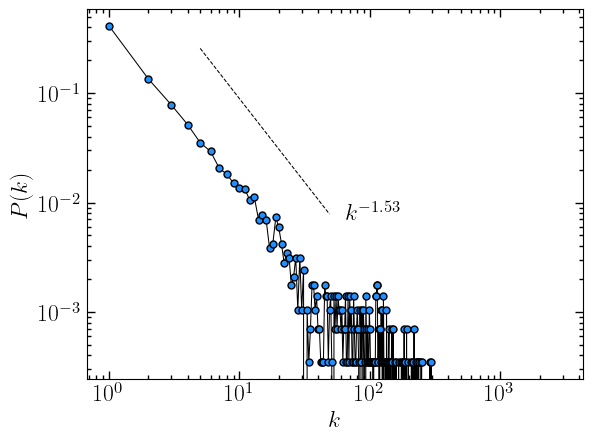

In [6]:
# Fitting to a power law 
x_data = np.array(k,dtype=float)[np.array(k,dtype=float)<200]
y_data = np.array(P_k, dtype=float)[np.array(k,dtype=float)<200]

from scipy.optimize import curve_fit
popt, pcov = curve_fit(powerlaw_model, x_data, y_data)

x_fit = np.arange(5,50)
y_fit = powerlaw_model(x_fit, 3, popt[1])


# Figure containing the Direct Degree Distribution with the power law fitting
fig, ax = plt.subplots()

k = ddd.index
P_k = ddd.values.reshape(-1)

ax.plot(k, P_k,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='dodgerblue',markersize=5)

ax.plot(x_fit,y_fit, color='black', linewidth=0.75, linestyle='--', label=f'$k^{{-{popt[1]:.2f}}}$')

ax.text(65, 0.007, f'$k^{{-{popt[1]:.2f}}}$',fontsize=17)

ax = axis_settings(ax,
                   xlabel=ddd.index.name,ylabel=ddd.columns[0],
                   fontsize=17,
                   log_scale=True,semilog_scale=None)

plt.savefig(fig_exp_path+'ddd_fit.pdf')

## 1.2. Complementary cumulative, $P_c(k)$ <a class="anchor" id="1.2"></a>

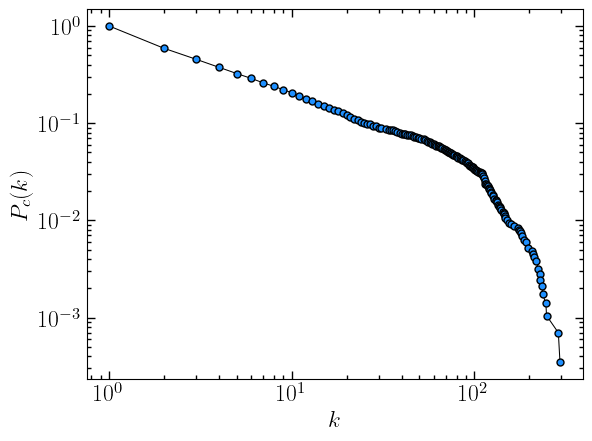

In [7]:
# Figure containing the Complementary Cumulative Degree Distribution
fig, ax = plt.subplots()

k = ccdd.index
Pc_k = ccdd.values.reshape(-1)

ax.plot(k, Pc_k,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='dodgerblue',markersize=5)

ax = axis_settings(ax,
                   xlabel=ccdd.index.name,ylabel=ccdd.columns[0],
                   fontsize=17,
                   log_scale=True,semilog_scale=None)

plt.savefig(fig_exp_path+'ccdd.pdf')

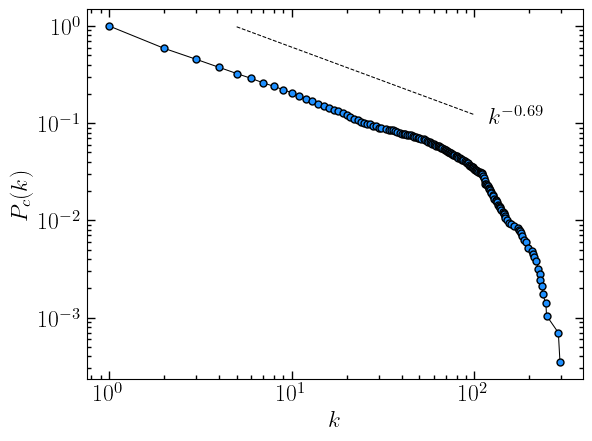

In [12]:
# Fitting to a power law 
x_data = np.array(k,dtype=float)[np.array(k,dtype=float)<100]
y_data = np.array(Pc_k, dtype=float)[np.array(k,dtype=float)<100]

from scipy.optimize import curve_fit
popt, pcov = curve_fit(powerlaw_model, x_data, y_data)

x_fit = np.arange(5,100)
y_fit = powerlaw_model(x_fit, 3, popt[1])


# Figure containing the Complementary Cumulative Degree Distribution with the power law fitting
fig, ax = plt.subplots()

k = ccdd.index
Pc_k = ccdd.values.reshape(-1)

ax.plot(k, Pc_k,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='∑',markersize=5)

ax.plot(x_fit,y_fit, color='black', linewidth=0.75, linestyle='--', label=f'$k^{{-{popt[1]:.2f}}}$')

ax.text(120, 0.1, f'$k^{{-{popt[1]:.2f}}}$',fontsize=17)

ax = axis_settings(ax,
                   xlabel=ccdd.index.name,ylabel=ccdd.columns[0],
                   fontsize=17,
                   log_scale=True,semilog_scale=None)

plt.savefig(fig_exp_path+'ccdd_fit.pdf')

# 2. Average nearest neighbors degree, $\bar{k}_{nn} (k)$ <a class="anchor" id="2"></a>

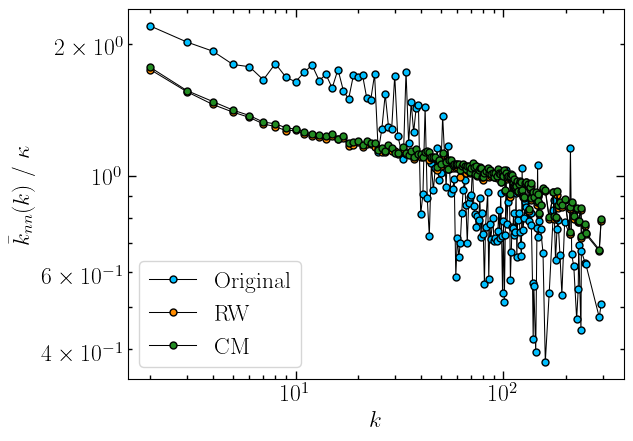

In [271]:
fig, ax = plt.subplots()

k = knn.index[knn[knn.columns[0]] != 0]
knn_k = knn.values.reshape(-1)[knn[knn.columns[0]] != 0]
ax.plot(k, knn_k,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='deepskyblue',markersize=5, label='Original')

k_rw = knn_rw.index[knn_rw[knn_rw.columns[0]] != 0]
knn_k_rw = knn_rw.values.reshape(-1)[knn_rw[knn_rw.columns[0]] != 0]
ax.plot(k_rw, knn_k_rw,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='darkorange',markersize=5, label='RW')

k_cm = knn_cm.index[knn_rw[knn_cm.columns[0]] != 0]
knn_k_cm = knn_cm.values.reshape(-1)[knn_cm[knn_cm.columns[0]] != 0]
ax.plot(k_cm, knn_k_cm,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='forestgreen',markersize=5, label='CM', )

ax = axis_settings(ax,
                   xlabel=knn.index.name,ylabel=fr'{knn.columns[0]} / $\kappa$',
                   fontsize=17,
                   log_scale=True,semilog_scale=None)

plt.legend(loc='lower left', fontsize=17, frameon=True)
plt.savefig(fig_exp_path+'knn.pdf')

# 3. Average clustering coefficient, $\bar{c}(k)$ <a class="anchor" id="3"></a>

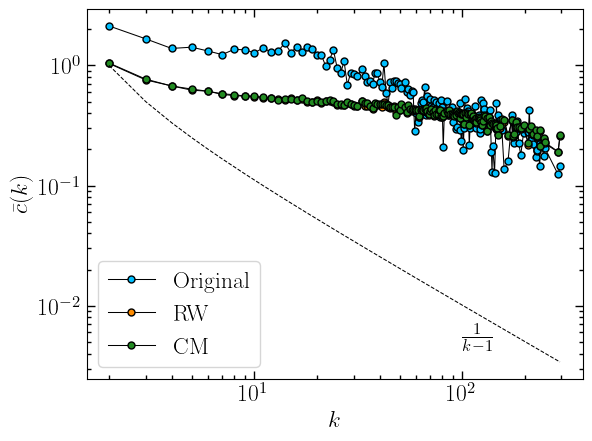

In [10]:
fig, ax = plt.subplots()

k = c.index[c[c.columns[0]] != 0]
c_k = c.values.reshape(-1)[c[c.columns[0]] != 0]
ax.plot(k, c_k,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='deepskyblue',markersize=5, label='Original')

k_rw = c_rw.index[c_rw[c_rw.columns[0]] != 0]
c_k_rw = c_rw.values.reshape(-1)[c_rw[c_rw.columns[0]] != 0]
ax.plot(k_rw, c_k_rw,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='darkorange',markersize=5, label='RW')

k_cm = c_cm.index[c_rw[c_cm.columns[0]] != 0]
c_k_cm = c_cm.values.reshape(-1)[c_cm[c_cm.columns[0]] != 0]
ax.plot(k_cm, c_k_cm,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='forestgreen',markersize=5, label='CM')

# Strong vs Weak clustering
ax.plot(k, 1/(k-1), color='black', linewidth=0.75, linestyle='--')
ax.text(100, 0.005, r'$\frac{1}{k-1}$',fontsize=17)

ax = axis_settings(ax,
                   xlabel=c.index.name,ylabel=fr'{c.columns[0]}',
                   fontsize=17,
                   log_scale=True,semilog_scale=None)

plt.legend(loc='lower left', fontsize=17, frameon=True)
plt.savefig(fig_exp_path+'c.pdf')

# 4. SIS dynamics <a class="anchor" id="4"></a>

## 4.1. Empirical prevalence as a function of time <a class="anchor" id="4.1"></a>

In [240]:
folder = data_imp_path+'SIS/SIS-rho_t'
pattern = 'SIS-rho_t_lambda*'
path = os.path.join(folder, pattern)
files = glob.glob(path)

rhos_t = pd.DataFrame()
for file in files:
    rho_t = pd.read_csv(file, header=None)
    rhos_t = pd.concat([rhos_t,rho_t],axis=1)
    match = re.search(fr'{pattern[:-1]}([\d.]+)\.txt', file)
    if match:
        lambda_ = float(match.group(1))
    rhos_t = rhos_t.rename(columns={0: lambda_})

lambdas = list(rhos_t.columns)
time = list(rhos_t.index)


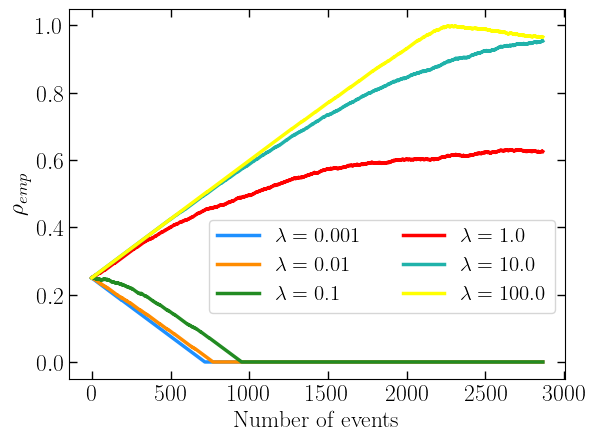

In [241]:
fig, ax = plt.subplots()
colors = ['dodgerblue','darkorange','forestgreen','red','lightseagreen','yellow']
for i,lambda_ in enumerate(sorted(lambdas)):
    ax.plot(time, rhos_t[lambda_].values,linestyle='-',color=colors[i],linewidth=2.5, label=fr'$\lambda = {lambda_}$')

ax = axis_settings(ax,
                   xlabel=r'Number of events',ylabel=r'$\rho_{emp}$',
                   fontsize=17,
                   log_scale=None,semilog_scale=None)


plt.legend(loc='lower right',fontsize=15,ncol=2,bbox_to_anchor=(1,0.15))
plt.savefig(fig_exp_path+'SIS-rho_t.pdf')

## 4.2. Stationary prevalence as a function of $\lambda$ <a class="anchor" id="4.2"></a>

In [276]:

folder = data_imp_path+'SIS/SIS-rho_st'
pattern = 'SIS-rho_st_*'
path = os.path.join(folder, pattern)
files = glob.glob(path)

rhos_st = pd.DataFrame()
for file in files:
    rho_st = pd.read_csv(file, header=None).mean().values[0]
    match = re.search(fr'{pattern[:-1]}([\d.]+)N_lambda([\d.]+)\.txt', file)
    if match:
        n = float(match.group(1))
        lambda_ = float(match.group(2))
        rhos_st.loc[n,lambda_] = rho_st

lambdas = list(rhos_st.columns)
ns = sorted(list(rhos_st.index))

rhos_st = rhos_st[sorted(lambdas)]

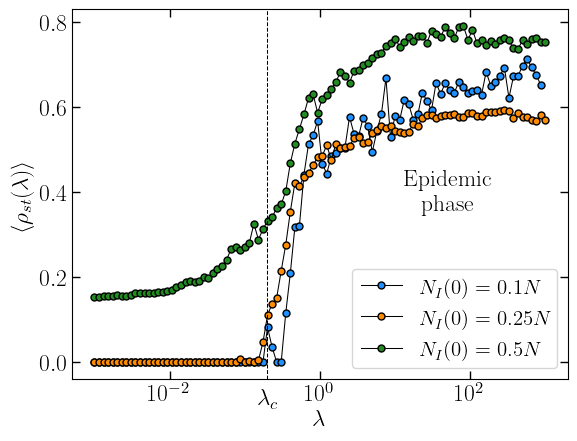

In [285]:
fig, ax = plt.subplots()

colors = ['dodgerblue','darkorange','forestgreen']

for i,n in enumerate(ns):
    
    ax.plot(sorted(lambdas), rhos_st.loc[n],
            marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor=colors[i],markersize=5, label=fr'$N_I(0) = {n} N$')

ax = axis_settings(ax,
                   xlabel=r'$\lambda$',ylabel=r'$ \langle \rho_{st} (\lambda) \rangle$',
                   fontsize=17,
                   log_scale=None,semilog_scale=None)
ax.set_xscale('log')

ax.axvline(x=0.2, color='black', linewidth=0.75, linestyle='--' )
ax.text(0.15,-0.1, r'$\lambda_c$',fontsize=17 )

ax.text(50, 0.4, 'Epidemic \n phase',fontsize=17, ha='center', va='center')

plt.legend(loc='lower right',fontsize=15)
plt.savefig(fig_exp_path+'SIS-rho_st.pdf')

## 4.3. Life-time distributions <a class="anchor" id="4.2"></a>

In [14]:
folder = data_imp_path+'SIS/SIS-life_time'
pattern = 'SIS-life_time_lambda*'
path = os.path.join(folder, pattern)
files = glob.glob(path)

lambdas = []
for file in files:
    match = re.search(r'SIS-life_time_lambda([\d.]+)\.txt', file)
    if match:
        lambda_ = float(match.group(1))
        lambdas.append(lambda_)
        
lambdas = np.array(lambdas)
lambdas = lambdas[lambdas > 0.1]
lambdas = lambdas[lambdas < 1]

times = pd.DataFrame()
for lambda_ in lambdas:
    file = data_imp_path+f'SIS/SIS-life_time/SIS-life_time_lambda{lambda_}.txt'
    time = pd.read_csv(file,header=None)
    times = pd.concat([times,time],axis=0) 

In [15]:
def compute_ccdf(data):
    
    """
    Computes the Complementary Cumulative Distribution Function (CCDF) of the data.
    
    INPUTS:
        data (list or np.array) : The input data for which the CCDF is to be computed.
        plot (bool) : If True, plots the CCDF. Default is True.

    OUTPUTS:
        sorted_data : 
        ccdf (plt.plot object): The CCDF plot object.
    """
    
    # Convert data to a numpy array if it's not already
    data = np.asarray(data)
    
    # Compute the cumulative distribution function (CDF)
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Compute the CCDF as 1 - CDF
    ccdf = 1 - cdf
    
    return sorted_data, ccdf

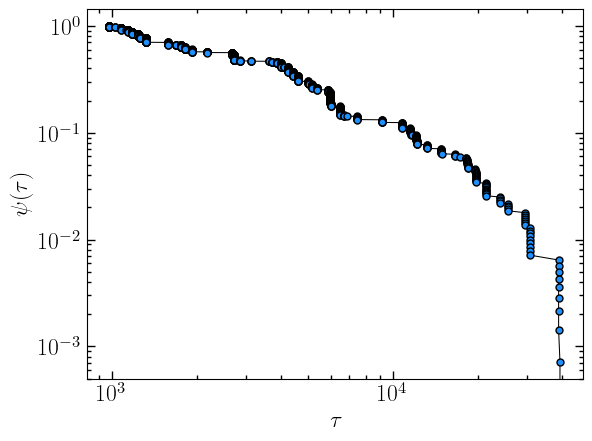

In [18]:
fig, ax = plt.subplots()

data = times.values.reshape(-1)
sorted_data, ccdf = compute_ccdf(data)

ax.plot(sorted_data, ccdf,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='dodgerblue',markersize=5)

ax = axis_settings(ax,
                   xlabel=r'$\tau$',ylabel=r'$\psi (\tau)$',
                   fontsize=17,
                   log_scale=True,semilog_scale=None)

plt.savefig(fig_exp_path+'life_times_distr.pdf')

In [20]:
len(data) / len(lambdas) / 100

1.0

# 5. Report plots <a class="anchor" id="5"></a>

## 5.1. Degree distributions <a class="anchor" id="5.1"></a>

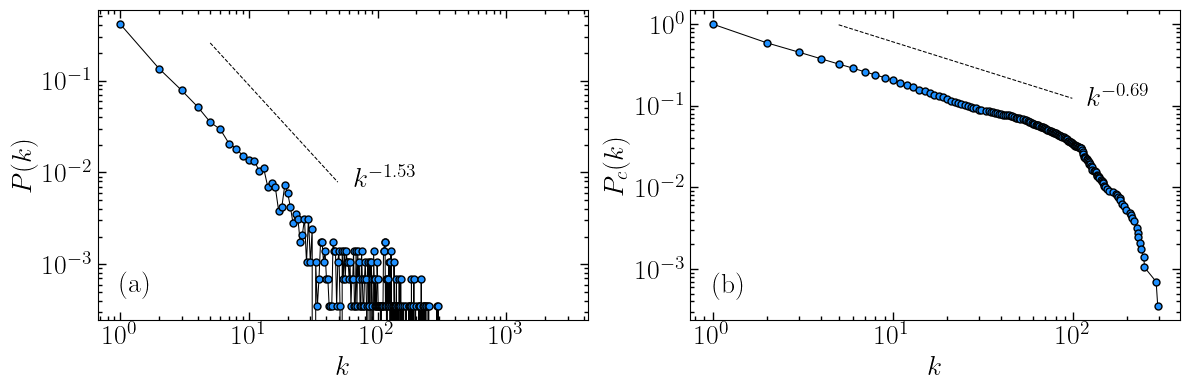

In [30]:
#------------------------------------------------------------------------------------------------------------------
# DEGREE DISTRIBUTIONS
#------------------------------------------------------------------------------------------------------------------
fig, axs = plt.subplots(1,2,figsize=(12,4))


# Direct Degree Distribution
#------------------------------------------------------------------------------------------------------------------

k = ddd.index
P_k = ddd.values.reshape(-1)


# Fitting to a power law 
x_data = np.array(k,dtype=float)[np.array(k,dtype=float)<200]
y_data = np.array(P_k, dtype=float)[np.array(k,dtype=float)<200]
from scipy.optimize import curve_fit
popt, pcov = curve_fit(powerlaw_model, x_data, y_data)
x_fit = np.arange(5,50)
y_fit = powerlaw_model(x_fit, 3, popt[1])


axs[0].plot(k, P_k,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='dodgerblue',markersize=5)

axs[0].plot(x_fit,y_fit, color='black', linewidth=0.75, linestyle='--', label=f'$k^{{-{popt[1]:.2f}}}$')

axs[0].text(65, 0.007, f'$k^{{-{popt[1]:.2f}}}$',fontsize=20)

axs[0] = axis_settings(axs[0],
                       xlabel=ddd.index.name,ylabel=ddd.columns[0],
                       fontsize=20,
                       log_scale=True,semilog_scale=None)



# Complementary Cumulative Degree Distribution
#------------------------------------------------------------------------------------------------------------------

k = ccdd.index
Pc_k = ccdd.values.reshape(-1)

# Fitting to a power law 
x_data = np.array(k,dtype=float)[np.array(k,dtype=float)<100]
y_data = np.array(Pc_k, dtype=float)[np.array(k,dtype=float)<100]
from scipy.optimize import curve_fit
popt, pcov = curve_fit(powerlaw_model, x_data, y_data)
x_fit = np.arange(5,100)
y_fit = powerlaw_model(x_fit, 3, popt[1])

axs[1].plot(k, Pc_k,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='dodgerblue',markersize=5)

axs[1].plot(x_fit,y_fit, color='black', linewidth=0.75, linestyle='--', label=f'$k^{{-{popt[1]:.2f}}}$')

axs[1].text(120, 0.1, f'$k^{{-{popt[1]:.2f}}}$',fontsize=20)

axs[1] = axis_settings(axs[1],
                       xlabel=ccdd.index.name,ylabel=ccdd.columns[0],
                       fontsize=20,
                       log_scale=True,semilog_scale=None)


axs[0].text(1, 0.0005, '(a)',fontsize=20, fontdict={'weight': 'bold'})
axs[1].text(1, 0.0005, '(b)',fontsize=20, fontdict={'weight': 'bold'})

plt.tight_layout()
plt.savefig(fig_exp_path+'degree_distributions.pdf')

# 5.2. Correlations <a class="anchor" id="5.2"></a>

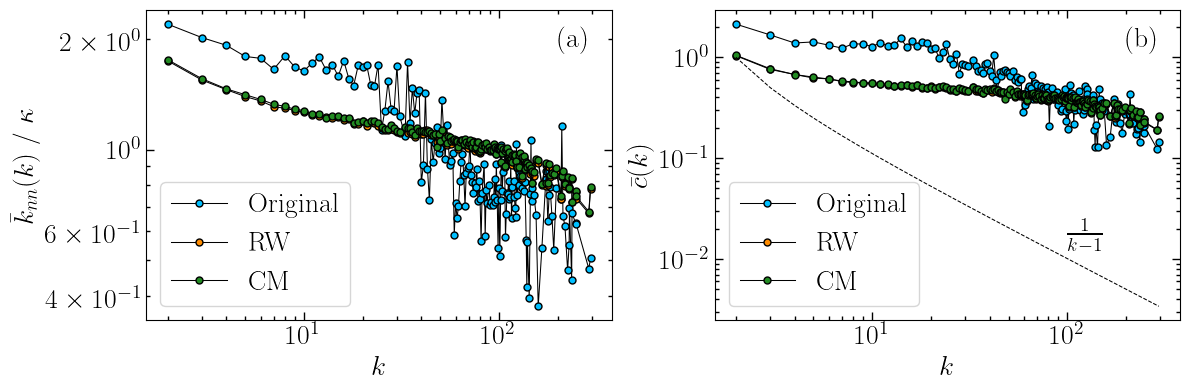

In [34]:
#------------------------------------------------------------------------------------------------------------------
# CORRELATIONS
#------------------------------------------------------------------------------------------------------------------
fig, axs = plt.subplots(1,2,figsize=(12,4))


# Average nearest neighbors degree
#------------------------------------------------------------------------------------------------------------------
k = knn.index[knn[knn.columns[0]] != 0]
knn_k = knn.values.reshape(-1)[knn[knn.columns[0]] != 0]
axs[0].plot(k, knn_k,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='deepskyblue',markersize=5, label='Original')

k_rw = knn_rw.index[knn_rw[knn_rw.columns[0]] != 0]
knn_k_rw = knn_rw.values.reshape(-1)[knn_rw[knn_rw.columns[0]] != 0]
axs[0].plot(k_rw, knn_k_rw,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='darkorange',markersize=5, label='RW')

k_cm = knn_cm.index[knn_rw[knn_cm.columns[0]] != 0]
knn_k_cm = knn_cm.values.reshape(-1)[knn_cm[knn_cm.columns[0]] != 0]
axs[0].plot(k_cm, knn_k_cm,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='forestgreen',markersize=5, label='CM', )

axs[0] = axis_settings(axs[0],
                   xlabel=knn.index.name,ylabel=fr'{knn.columns[0]} / $\kappa$',
                   fontsize=20,
                   log_scale=True,semilog_scale=None)

axs[0].legend(loc='lower left', fontsize=20, frameon=True)



# Average clustering coefficient
#------------------------------------------------------------------------------------------------------------------

k = c.index[c[c.columns[0]] != 0]
c_k = c.values.reshape(-1)[c[c.columns[0]] != 0]
axs[1].plot(k, c_k,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='deepskyblue',markersize=5, label='Original')

k_rw = c_rw.index[c_rw[c_rw.columns[0]] != 0]
c_k_rw = c_rw.values.reshape(-1)[c_rw[c_rw.columns[0]] != 0]
axs[1].plot(k_rw, c_k_rw,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='darkorange',markersize=5, label='RW')

k_cm = c_cm.index[c_rw[c_cm.columns[0]] != 0]
c_k_cm = c_cm.values.reshape(-1)[c_cm[c_cm.columns[0]] != 0]
axs[1].plot(k_cm, c_k_cm,
        marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor='forestgreen',markersize=5, label='CM')

# Strong vs Weak clustering
axs[1].plot(k, 1/(k-1), color='black', linewidth=0.75, linestyle='--')
axs[1].text(100, 0.015, r'$\frac{1}{k-1}$',fontsize=20)

axs[1] = axis_settings(axs[1],
                   xlabel=c.index.name,ylabel=fr'{c.columns[0]}',
                   fontsize=20,
                   log_scale=True,semilog_scale=None)

axs[1].legend(loc='lower left', fontsize=20, frameon=True)


axs[0].text(2*10**2, 1.9, '(a)',fontsize=20, fontdict={'weight': 'bold'})
axs[1].text(2*10**2, 1.25, '(b)',fontsize=20, fontdict={'weight': 'bold'})

plt.tight_layout()
plt.savefig(fig_exp_path+'correlations.pdf')

# 5.3. Empirical and stationary prevalences

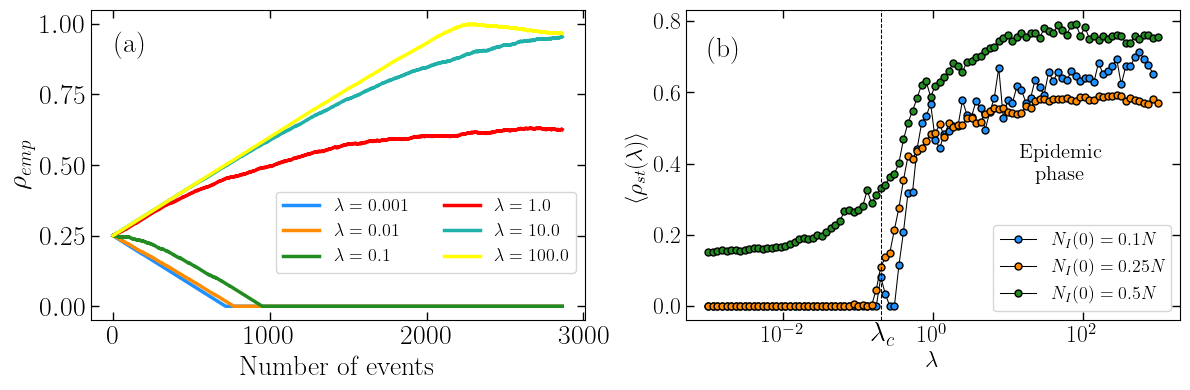

In [302]:
#------------------------------------------------------------------------------------------------------------------
# EMPIRICAL AND STATIONARY PREVALENCES
#------------------------------------------------------------------------------------------------------------------

fig, axs = plt.subplots(1,2,figsize=(12,4))


# Empirical prevalence as a function of time
#------------------------------------------------------------------------------------------------------------------

folder = data_imp_path+'SIS/SIS-rho_t'
pattern = 'SIS-rho_t_lambda*'
path = os.path.join(folder, pattern)
files = glob.glob(path)

rhos_t = pd.DataFrame()
for file in files:
    rho_t = pd.read_csv(file, header=None)
    rhos_t = pd.concat([rhos_t,rho_t],axis=1)
    match = re.search(fr'{pattern[:-1]}([\d.]+)\.txt', file)
    if match:
        lambda_ = float(match.group(1))
    rhos_t = rhos_t.rename(columns={0: lambda_})

lambdas = list(rhos_t.columns)
time = list(rhos_t.index)

colors = ['dodgerblue','darkorange','forestgreen','red','lightseagreen','yellow']
for i,lambda_ in enumerate(sorted(lambdas)):
    axs[0].plot(time, rhos_t[lambda_].values,linestyle='-',color=colors[i],linewidth=2.5, label=fr'$\lambda = {lambda_}$')

axs[0] = axis_settings(axs[0],
                   xlabel=r'Number of events',ylabel=r'$\rho_{emp}$',
                   fontsize=20,
                   log_scale=None,semilog_scale=None)


axs[0].legend(loc='lower right',fontsize=13,ncol=2,bbox_to_anchor=(1,0.125))

# Stationary prevalence as a function of the infection rate
#------------------------------------------------------------------------------------------------------------------
folder = data_imp_path+'SIS/SIS-rho_st'
pattern = 'SIS-rho_st_*'
path = os.path.join(folder, pattern)
files = glob.glob(path)

rhos_st = pd.DataFrame()
for file in files:
    rho_st = pd.read_csv(file, header=None).mean().values[0]
    match = re.search(r'SIS-rho_st_([\d.]+)N_lambda([\d.]+)\.txt', file)
    if match:
        n = float(match.group(1))
        lambda_ = float(match.group(2))
        rhos_st.loc[n,lambda_] = rho_st

lambdas = list(rhos_st.columns)
ns = sorted(list(rhos_st.index))

rhos_st = rhos_st[sorted(lambdas)]


colors = ['dodgerblue','darkorange','forestgreen']

for i,n in enumerate(ns):
    
    axs[1].plot(sorted(lambdas), rhos_st.loc[n],
            marker ='o',linestyle='-',color='black',linewidth=0.75,markerfacecolor=colors[i],markersize=5, label=fr'$N_I(0) = {n} N$')

axs[1] = axis_settings(axs[1],
                   xlabel=r'$\lambda$',ylabel=r'$ \langle \rho_{st} (\lambda) \rangle$',
                   fontsize=17,
                   log_scale=None,semilog_scale=None)
axs[1].set_xscale('log')

axs[1].axvline(x=0.2, color='black', linewidth=0.75, linestyle='--' )
axs[1].text(0.15,-0.1, r'$\lambda_c$',fontsize=20 )

axs[1].text(50, 0.4, 'Epidemic \n phase',fontsize=15, ha='center', va='center')

axs[1].legend(loc='lower right',fontsize=13)



axs[0].text(10, 0.9, '(a)',fontsize=20, fontdict={'weight': 'bold'})
axs[1].text(1*10**-3, 0.7, '(b)',fontsize=20, fontdict={'weight': 'bold'})


plt.tight_layout()
plt.savefig(fig_exp_path+'SIS-rhos.pdf')